In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('congress_bills.csv')

In [103]:
print('Rows:', len(df), 'Columns:', df.shape[1])
mem = df.memory_usage(deep=True).sum() / (1024**2)
print(f'Memory MB: {mem:.2f}')
display(df.head(3))
display(df.tail(3))
display(df.describe(include='all').T)

Rows: 70250 Columns: 14
Memory MB: 41.01


,congress,type,number,url,title,chamber,introduced,sponsor,sponsor_party,policy_area,passed_senate,passed_house,to_president,became_law
0,119,S,2403,https://api.congress.gov/v3/bill/119/s/2403?fo...,Retire through Ownership Act,S,2025-07-23,"Sen. Marshall, Roger [R-KS]",R,Labor and Employment,True,False,False,False
1,119,S,1728,https://api.congress.gov/v3/bill/119/s/1728?fo...,Employee Ownership Representation Act of 2025,S,2025-05-13,"Sen. Cassidy, Bill [R-LA]",R,Labor and Employment,True,False,False,False
2,119,S,1440,https://api.congress.gov/v3/bill/119/s/1440?fo...,Uniformed Services Leave Parity Act,S,2025-04-10,"Sen. Duckworth, Tammy [D-IL]",D,Health,True,False,False,False


,congress,type,number,url,title,chamber,introduced,sponsor,sponsor_party,policy_area,passed_senate,passed_house,to_president,became_law
70247,113,S,285,https://api.congress.gov/v3/bill/113/s/285?for...,Valles Caldera National Preserve Management Act,S,2013-02-12 00:00:00,"Sen. Udall, Tom [D-NM]",D,Public Lands and Natural Resources,False,False,False,False
70248,113,S,28,https://api.congress.gov/v3/bill/113/s/28?form...,Upper Y Mountain Trail and Y Conveyance Act,S,2013-01-22 00:00:00,"Sen. Hatch, Orrin G. [R-UT]",R,Public Lands and Natural Resources,False,False,False,False
70249,113,S,255,https://api.congress.gov/v3/bill/113/s/255?for...,North Fork Watershed Protection Act of 2013,S,2013-02-07 00:00:00,"Sen. Baucus, Max [D-MT]",D,Public Lands and Natural Resources,False,False,False,False


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
congress,70250.0,NaN,NaN,NaN,116.41032,1.91611,113.0,115.0,116.0,118.0,119.0
type,70250,8,HR,39876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,70250.0,NaN,NaN,NaN,3251.04753,2598.659686,1.0,972.0,2772.5,4918.0,10564.0
url,70250,70250,https://api.congress.gov/v3/bill/119/s/2403?fo...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,70250,52718,Electing Members to certain standing committee...,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chamber,70250,2,H,47481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
introduced,70250,2388,2023-03-29 00:00:00,612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sponsor,70250,1208,"Rep. Biggs, Andy [R-AZ-5]",806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sponsor_party,70250,4,D,35966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_area,69486,33,Health,7766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# make one column for a unique id congress.type.number
df['id'] = (df['congress'].astype('string')+'.'
            +df['type'].astype('string')+'.'
            +df['number'].astype('string'))

In [105]:
df.id

0          119.S.2403
1          119.S.1728
2          119.S.1440
3          119.S.2283
4        119.SRES.337
             ...     
70245       113.S.159
70246       113.S.155
70247       113.S.285
70248        113.S.28
70249       113.S.255
Name: id, Length: 70250, dtype: string

In [106]:
# check for duplicates
len(df[df.duplicated()])

0

In [107]:
# looks like the `type` of bill includes more than just house/senate
df.type.unique()

array(['S', 'SRES', 'HR', 'SJRES', 'HRES', 'HJRES', 'HCONRES', 'SCONRES'],
      dtype=object)

In [108]:
# should we include these other types? 
def pass_percent(row, value):
    return len(df[(df[row]==value)&df.became_law])/len(df[df.became_law])

types = df.type.unique()
for bill_type in types:
    passage = pass_percent('type', bill_type)
    print(f'type = {bill_type}\npass% = {passage}\n')

type = S
pass% = 0.30404463040446306

type = SRES
pass% = 0.0

type = HR
pass% = 0.6582984658298466

type = SJRES
pass% = 0.011854951185495118

type = HRES
pass% = 0.0

type = HJRES
pass% = 0.02580195258019526

type = HCONRES
pass% = 0.0

type = SCONRES
pass% = 0.0



After looking more into the [details](https://www.senate.gov/legislative/common/briefing/leg_laws_acts.htm), it turns out there are not only regular bills, but there are also three type of resolutions: Joint Resolutions, Concurrent Resolutions and Simple Resolutions. Only Bills and Joint Resolutions have the potential to become law; the others are for deciding rules which apply to doing business within the chambers themselves. We should remove those from the table.

In [109]:
df = df[df.type.isin(['HR', 'S', 'HJRES', 'SJRES'])]
df.type.unique()

array(['S', 'HR', 'SJRES', 'HJRES'], dtype=object)

In [110]:
# looks like there are more than two parties: 
# Democrat, Republican, Independent, and Libertarian
df.sponsor_party.unique()

array(['R', 'D', 'I', 'L'], dtype=object)

In [111]:
# Only 2 have been sponsored by Libertarian party (same represetative)
# and neither passed any chamber. Might be worth excluding from consideration
df[(df.sponsor_party == 'L')]

,congress,type,number,url,title,chamber,introduced,sponsor,sponsor_party,policy_area,passed_senate,passed_house,to_president,became_law,id
34996,116,HR,8651,https://api.congress.gov/v3/bill/116/hr/8651?f...,"To acknowledge the crime of lynching, and for ...",H,2020-10-23 00:00:00,"Rep. Amash, Justin [L-MI-3]",L,Crime and Law Enforcement,False,False,False,False,116.HR.8651
35156,116,HR,8549,https://api.congress.gov/v3/bill/116/hr/8549?f...,To prohibit the retention of incidentally acqu...,H,2020-10-09 00:00:00,"Rep. Amash, Justin [L-MI-3]",L,Armed Forces and National Security,False,False,False,False,116.HR.8549


In [112]:
# Independent sponsorship is less of an outlier, though less likely to pass
dem_pass = len(df[(df.sponsor_party == 'D') & df.became_law]) / len(df[df.sponsor_party == 'D'])
rep_pass = len(df[(df.sponsor_party == 'R') & df.became_law]) / len(df[df.sponsor_party == 'R'])
ind_pass = len(df[(df.sponsor_party == 'I') & df.became_law]) / len(df[df.sponsor_party == 'I'])
print(f'bill passage percentage:\nD : {dem_pass:.3f}\nR : {rep_pass:.3f}\nI : {ind_pass:.3f}')

bill passage percentage:
D : 0.020
R : 0.029
I : 0.009


In [113]:
df.columns

Index(['congress', 'type', 'number', 'url', 'title', 'chamber', 'introduced',
       'sponsor', 'sponsor_party', 'policy_area', 'passed_senate',
       'passed_house', 'to_president', 'became_law', 'id'],
      dtype='object')

In [114]:
# drop some columns which aren't relevant features
df.drop(['url', 'title', 'sponsor'], axis=1, inplace=True)

In [115]:
# rename a few columns for convenience: 'type' is already reserved in python
df.rename(columns={'type':'bill_type', 'sponsor_party':'party', 'became_law':'law', 'introduced':'date'}, inplace=True)

In [118]:
df.date

0                 2025-07-23
1                 2025-05-13
2                 2025-04-10
3                 2025-07-15
8                 2025-09-16
                ...         
70245    2013-01-28 00:00:00
70246    2013-01-28 00:00:00
70247    2013-02-12 00:00:00
70248    2013-01-22 00:00:00
70249    2013-02-07 00:00:00
Name: date, Length: 60139, dtype: object

In [119]:
pd.to_datetime(df.date, format='mixed')

0       2025-07-23
1       2025-05-13
2       2025-04-10
3       2025-07-15
8       2025-09-16
           ...    
70245   2013-01-28
70246   2013-01-28
70247   2013-02-12
70248   2013-01-22
70249   2013-02-07
Name: date, Length: 60139, dtype: datetime64[ns]

In [128]:
# let's also add how many of each chamber belonged to which party for each congress
party_df = pd.read_csv('../csv/HSall_parties.csv')
party_df.head()

,congress,chamber,party_code,party_name,n_members,nominate_dim1_median,nominate_dim2_median,nominate_dim1_mean,nominate_dim2_mean
0,1,President,5000,Pro-Administration,1,NaN,NaN,NaN,NaN
1,1,House,4000,Anti-Administration,29,0.0180,0.0920,-0.024379,0.141931
2,1,House,5000,Pro-Administration,31,0.5760,0.0040,0.513161,-0.009484
3,1,Senate,4000,Anti-Administration,9,-0.2375,-0.2130,-0.239750,-0.044750
4,1,Senate,5000,Pro-Administration,20,0.4270,-0.3085,0.352050,-0.166200


In [130]:
party_df = party_df[party_df.congress.isin(df.congress.unique())]
party_df

,congress,chamber,party_code,party_name,n_members,nominate_dim1_median,nominate_dim2_median,nominate_dim1_mean,nominate_dim2_mean
803,113,President,100,Democrat,1,-0.3580,-0.1970,-0.358000,-0.197000
804,113,House,100,Democrat,204,-0.3940,-0.0780,-0.384382,-0.069539
805,113,House,200,Republican,240,0.4900,0.0880,0.481758,0.051171
806,113,Senate,100,Democrat,57,-0.3330,-0.1210,-0.326421,-0.079912
807,113,Senate,200,Republican,46,0.4250,-0.0075,0.469826,-0.037022
808,113,Senate,328,Independent,2,-0.3560,-0.3110,-0.356000,-0.311000
809,114,President,100,Democrat,1,-0.3580,-0.1970,-0.358000,-0.197000
810,114,House,100,Democrat,190,-0.3965,-0.0780,-0.394563,-0.076779
811,114,House,200,Republican,251,0.4900,0.0770,0.480000,0.047024
812,114,Senate,100,Democrat,44,-0.3380,-0.1495,-0.333591,-0.128386


<Axes: xlabel='date', ylabel='policy_area'>

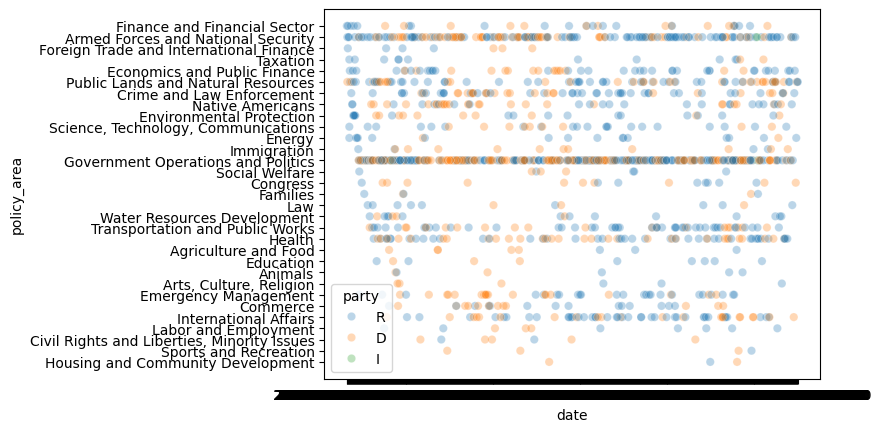

In [127]:
import seaborn as sns
sns.scatterplot(df[df.law], x='date', y='policy_area', hue='party', alpha=0.3)